In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv(r'D:\Sem - 5\ML- LAB\Assg-3 - Logistic Regression\Iris DataSet.csv')
df['ncol'] = (df['Species'] == 'Iris-virginica').astype(int)
x = df.iloc[ : , :-2]
y = df.iloc[ : , -1]

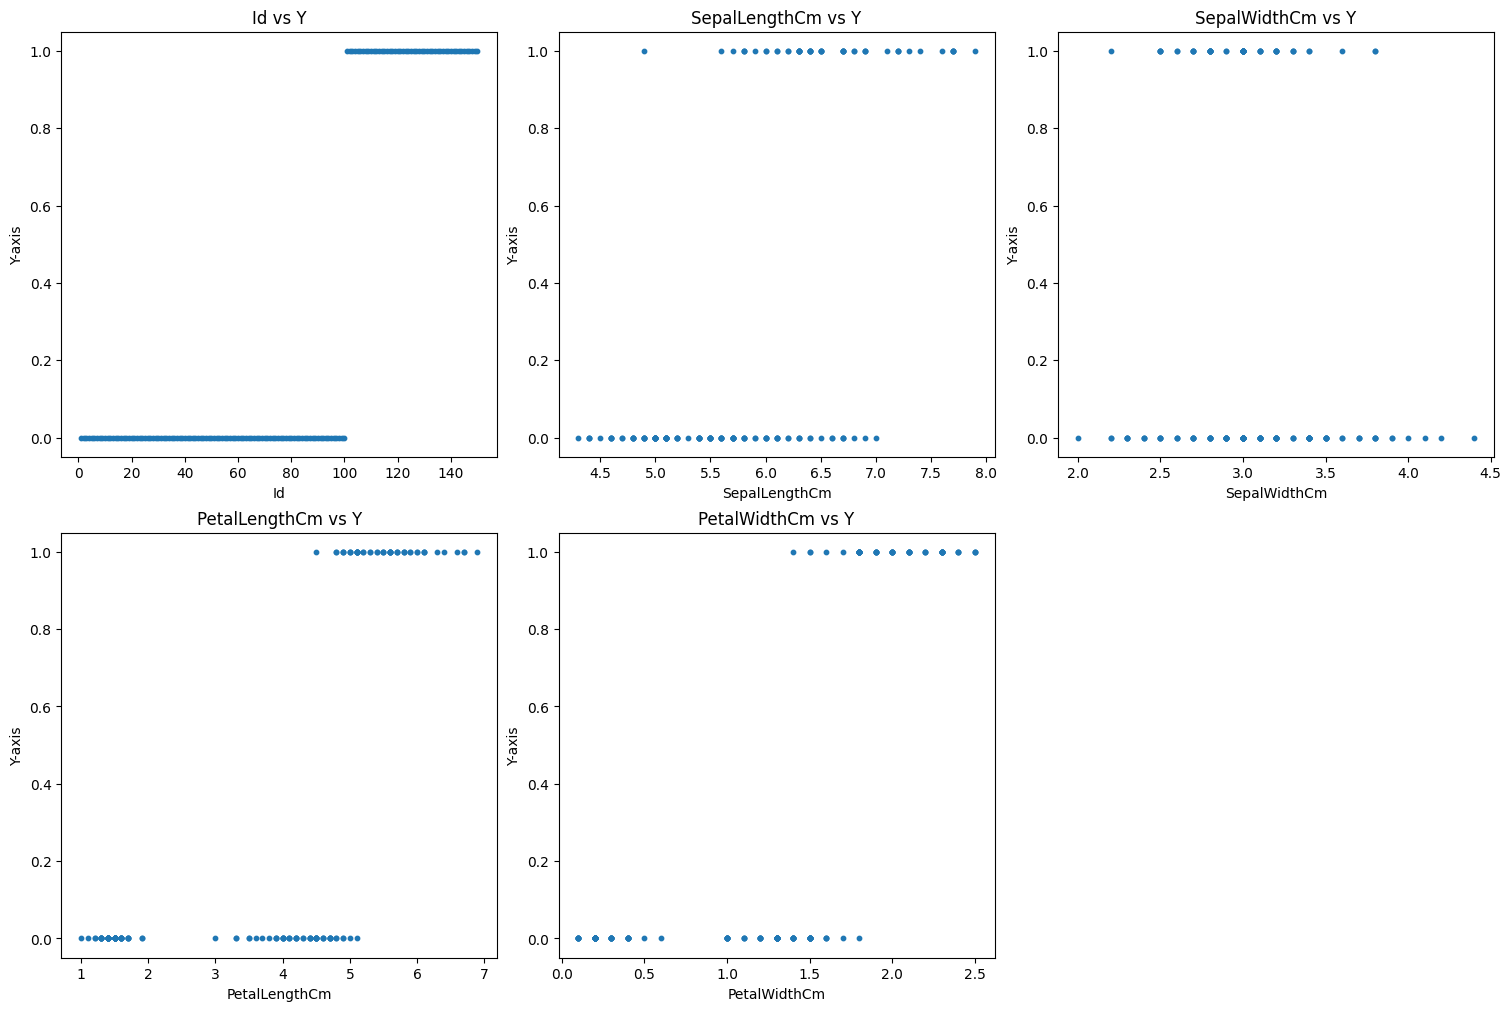

In [6]:
# Create a grid of subplots
num_features = x.shape[1]  # Number of features
cols = 3  # Number of columns in the grid
rows = (num_features + cols - 1) // cols  # Calculate required rows based on columns
fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows), constrained_layout=True)

axs = axs.flatten()

# Plot each feature against y
for i in range(num_features):
    axs[i].scatter(x.iloc[:, i], y, s=10)  # `s=10` for smaller markers
    axs[i].set_xlabel(x.columns[i])
    axs[i].set_ylabel('Y-axis')
    axs[i].set_title(f'{x.columns[i]} vs Y')

# Hide any unused subplots
for j in range(num_features, len(axs)):
    fig.delaxes(axs[j])
    
plt.show()

In [7]:
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.20, random_state = 1024, shuffle = True)
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

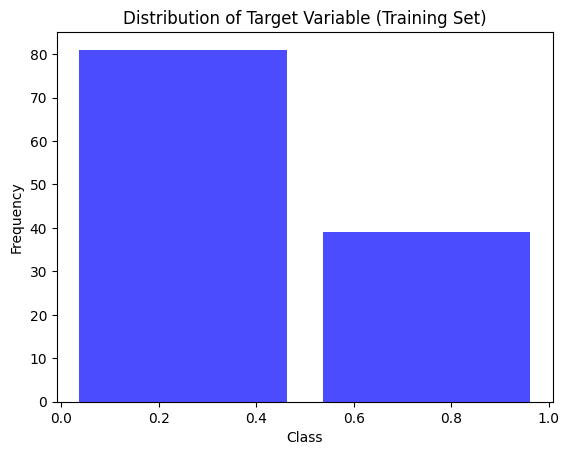

In [8]:
# distribution of target variable
# histogram
plt.hist(y_train, bins=2, alpha=0.7, color='blue', rwidth=0.85)
plt.title('Distribution of Target Variable (Training Set)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [9]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))
def model(x, y, iter, alpha):
    b = 0
    m = x.shape[0]
    n = x.shape[1]
    w = np.zeros((n, 1))
    costs = []
    for _ in range(iter):
        ypred = np.dot(x, w) + b
        a = sigmoid(ypred)
        cost = (-1/m)*np.sum(y*np.log(a) + (1-y)*np.log(1-a))
        dldw = (1/m)*np.dot(x.T, (a-y))
        dldb = (1/m)*np.sum((a-y))
        w = w - dldw * alpha
        b = b - dldb * alpha
        costs.append(cost)
    return w, b, costs

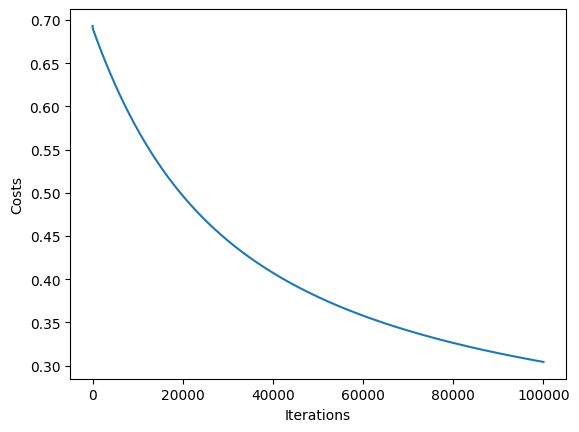

In [10]:
iter = 100000
alpha = 0.00001

w, b, costs = model(x_train, y_train, iter, alpha)

plt.plot(range(iter), costs)
plt.xlabel('Iterations')
plt.ylabel('Costs')
plt.show()

ztest = np.dot(x_test, w) + b
atest = sigmoid(ztest)
ypred = (atest >= 0.5).astype(int)

In [11]:
def performanceMetrics(ypred, ytrue):
    Tp = np.sum((ypred == 1) & (ytrue == 1))
    Tn = np.sum((ypred == 0) & (ytrue == 0))
    Fp = np.sum((ypred == 1) & (ytrue == 0))
    Fn = np.sum((ypred == 0) & (ytrue == 1))

    accuracy = (Tp+Tn) / len(ytrue)
    precision = Tp / (Tp + Fp) if (Tp + Fp != 0) else 0
    recall = Tp / (Tp + Fn)  if (Tp + Fn != 0) else 0
    f1score = (2*precision*recall)/ (precision + recall)
    return accuracy, precision, recall, f1score

accuracy, precision, recall, f1score= performanceMetrics(ypred, y_test)

print(f'accuracy : {accuracy : .4f}')
print(f'precision : {precision : .4f}')
print(f'recall : {recall : .4f}')
print(f'f1score : {f1score : .4f}')

accuracy :  0.9000
precision :  0.8333
recall :  0.9091
f1score :  0.8696


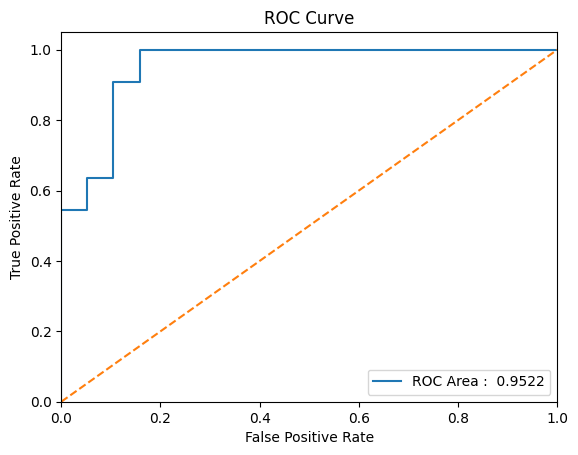

In [12]:
# x-axis is fpr
# y-axis is tpr
fpr, tpr, _ = roc_curve(y_test, atest)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = f'ROC Area : {roc_auc : .4f}')
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc = "lower right")
plt.show()